# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [11]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [12]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [13]:
# Write your code here to read the data
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
path="/content/drive/MyDrive/Great_Learning/files/python_foundations/foodhub_order.csv"
foodhub_df=pd.read_csv(path)

In [15]:
# Write your code here to view the first 5 rows
foodhub_df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [16]:
# Write your code here
foodhub_df.shape

(1898, 9)

#### **Observations:**  

I see 1898 rows  and 9 columns present in the Data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [17]:
# Write your code here
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**

 I see below columns as int64 data type.

order_id,

customer_id,

food_preparation_time,

delivery_time  

#### **Below columns as object data type:**
restaurant_name,

day_of_the_week,

food_preparation_time

#### **Below columns as float64 data type:**

cost_of_the_order



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [18]:
# Write your code here
foodhub_df.replace('', np.nan, inplace=True)
missing_values_foodhub = foodhub_df.isnull().sum()
missing_values_foodhub

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: I do not see any missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [19]:
# Write your code here
summary_foodhub_df = foodhub_df['food_preparation_time'].describe()
# Extract the minimum, average (mean), and maximum food preparation time
min_prep_time = summary_foodhub_df['min']
avg_prep_time = summary_foodhub_df['mean']
max_prep_time = summary_foodhub_df['max']
print("Statistical summary of the DataFrame:\n", summary_foodhub_df)
print("\nMinimum food preparation time:", min_prep_time)
print("Average (mean) food preparation time:", avg_prep_time)
print("Maximum food preparation time:", max_prep_time)

Statistical summary of the DataFrame:
 count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Minimum food preparation time: 20.0
Average (mean) food preparation time: 27.371970495258168
Maximum food preparation time: 35.0


#### **Observations:**

*     The count is 1898, indicating there are 1898 observations in the food_preparation_time column.

####**Mean:**

*   The mean (average) food preparation time is approximately 27.37 minutes. This suggests that, on average, it takes about 27 to 28 minutes to prepare food once an order is placed.

####**Std:**

*   The std (standard deviation) is about 4.63 minutes. This indicates that the food preparation times vary by about 4.63 minutes around the mean.

####**25%, 50%, 75%:**

*   The 25%, 50% (median), and 75% percentiles are 23.00, 27.00, and 31.00 minutes respectively.

##### **This suggests that:**

*   25% of the orders have a preparation time of 23 minutes or less.

*   50% of the orders have a preparation time of 27 minutes or less (this is the median).

*   75% of the orders have a preparation time of 31 minutes or less.

####**Range:**

*   The min (minimum) food preparation time is 20 minutes, indicating the quickest preparation time observed.

*   The max (maximum) food preparation time is 35 minutes, indicating the longest preparation time observed.

####**Summary:**

*   The majority of food preparation times are clustered around 27 minutes, with a typical variation of about 4.6 minutes.

*   The preparation times range from 20 to 35 minutes.

*   The central 50% of the data (between the 25th and 75th percentiles) spans an 8-minute interval.


### **Question 5:** How many orders are not rated? [1 mark]

1.   List item
2.   List item



In [20]:
foodhub_df['rating']

,rating
0,Not given
1,Not given
2,5
3,3
4,4
...,...
1893,5
1894,5
1895,Not given
1896,5


In [21]:
grouped_ratings = foodhub_df.groupby('rating')['order_id'].count()

In [22]:
grouped_ratings

,order_id
rating,
3,188
4,386
5,588
Not given,736


In [23]:
num_not_rated_orders = grouped_ratings.get('Not given', 0)

print(f"Number of orders that are not rated: {num_not_rated_orders}")

Number of orders that are not rated: 736


#### **Observations:**

#### **Number of Orders Not Rated:**


*  There are 736 orders that are not rated in the dataset, which is a significant portion of the total orders.

####**Ratings:**

*   The high count of 4 and 5 ratings suggests good service quality, but the missing ratings ('Not given') highlight an area for improvement in feedback collection.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [24]:
# Set up plotting style
sns.set(style="whitegrid")# Write the code here

In [25]:
# Continuous variables
continuous_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

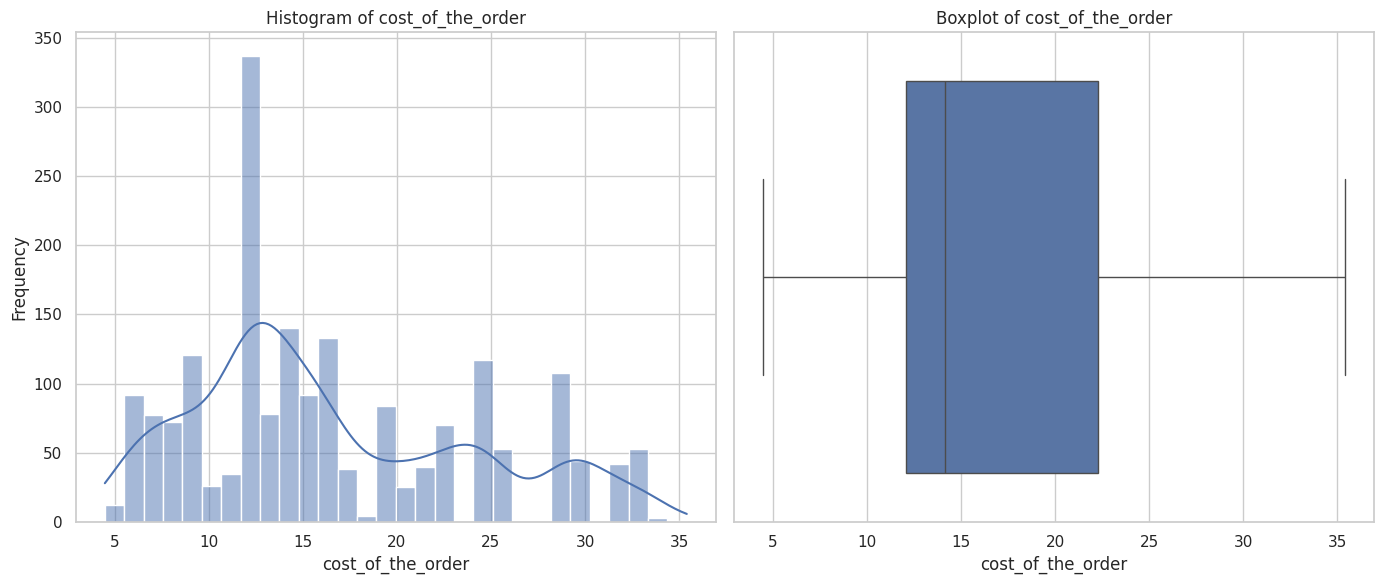

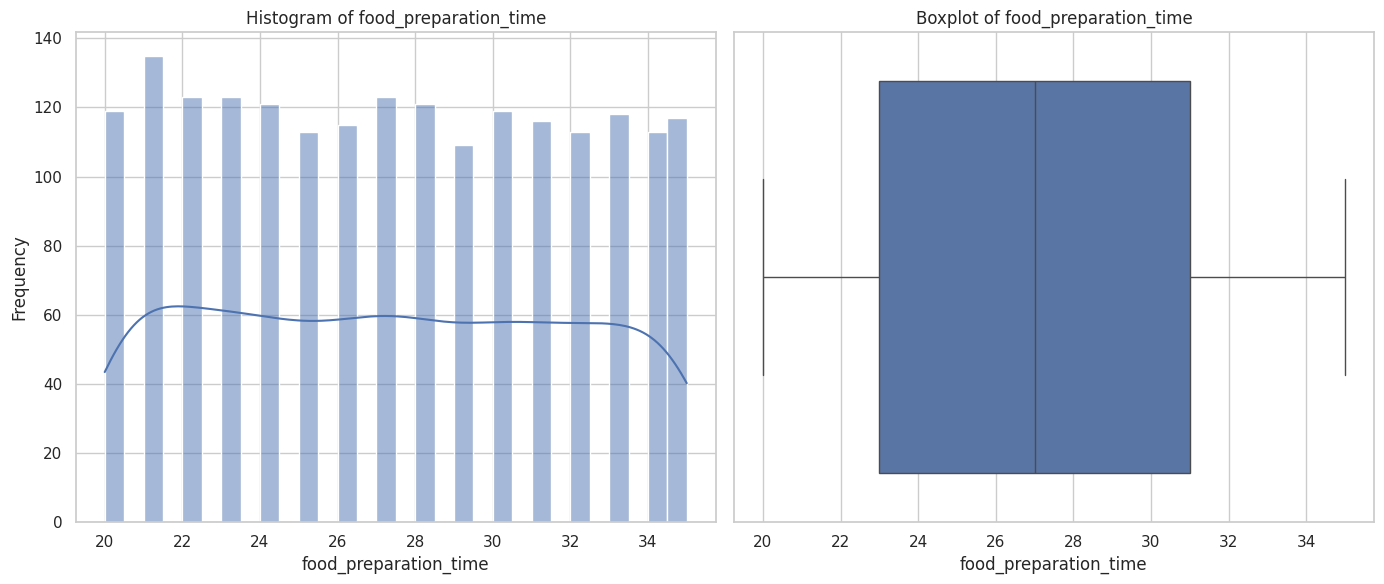

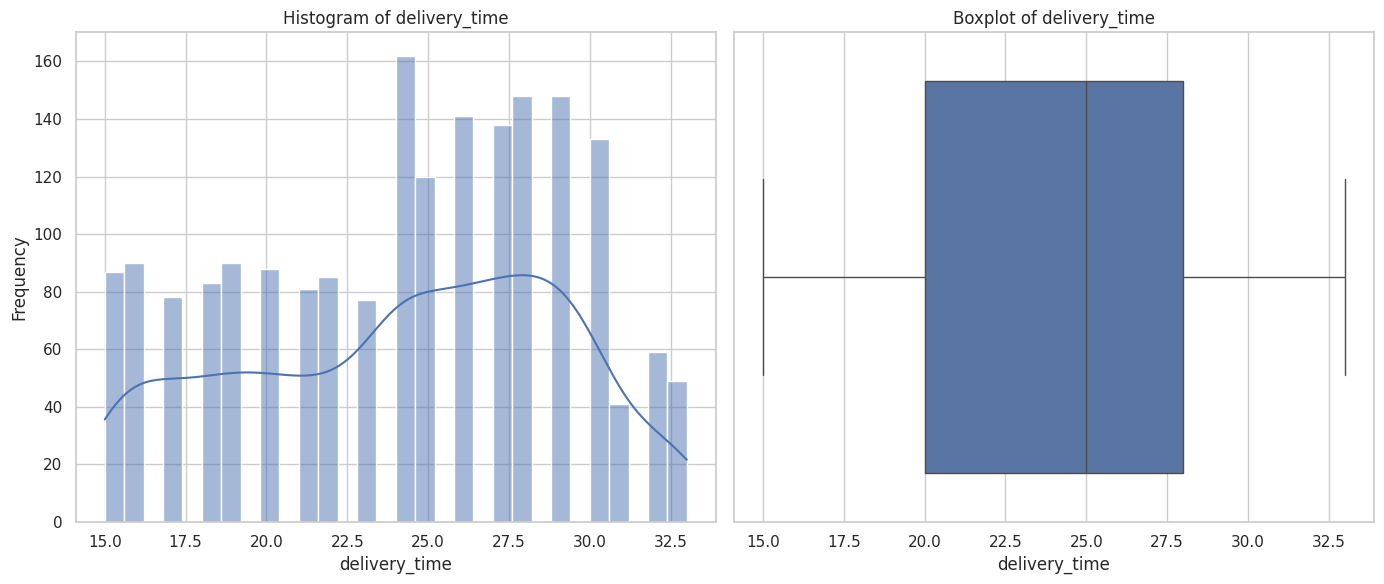

In [26]:
for var in continuous_vars:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(foodhub_df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=foodhub_df[var])
    plt.title(f'Boxplot of {var}')

    plt.tight_layout()
    plt.show()

<ipython-input-27-e99789fcb7d0>:13: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent clipping
<ipython-input-27-e99789fcb7d0>:13: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent clipping
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


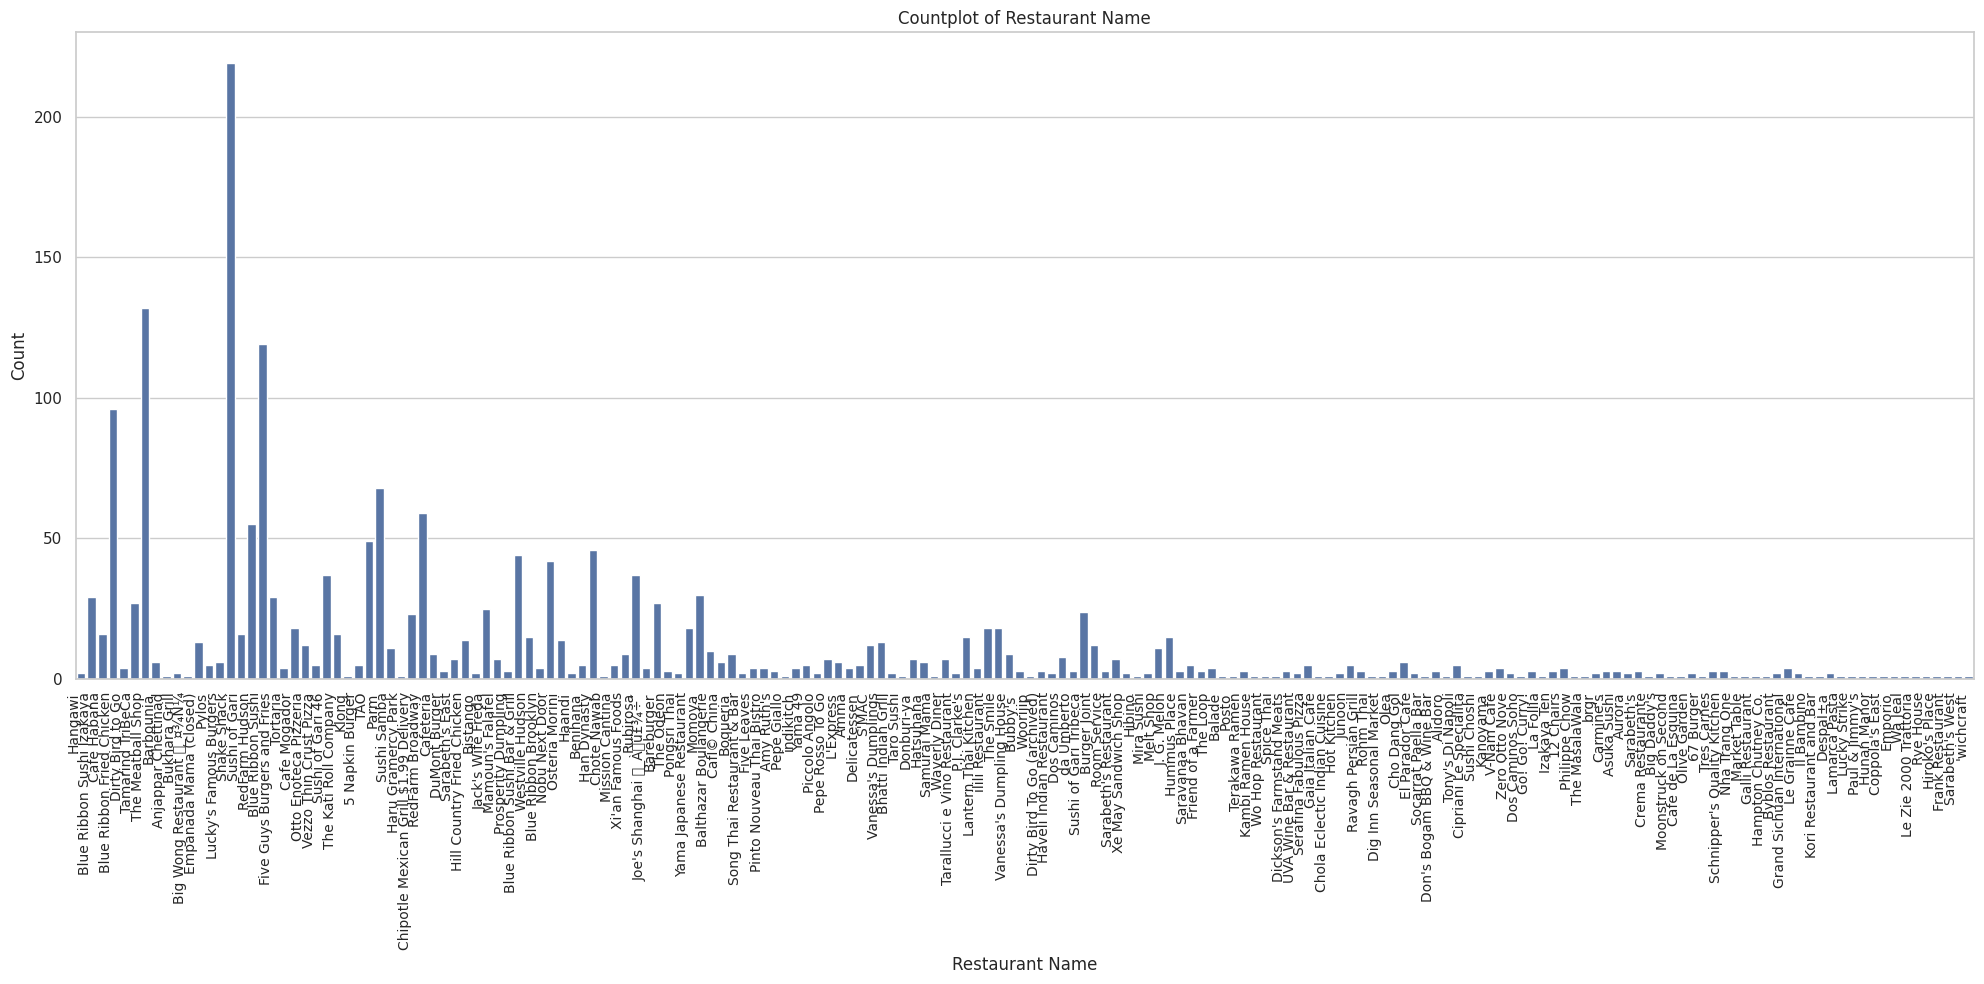

In [27]:
# Set up plotting style
sns.set(style="whitegrid")

# Categorical variable: restaurant_name
plt.figure(figsize=(20, 10))  # Further increase the figure size
sns.countplot(x='restaurant_name', data=foodhub_df)
plt.title('Countplot of Restaurant Name')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate more and reduce font size
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

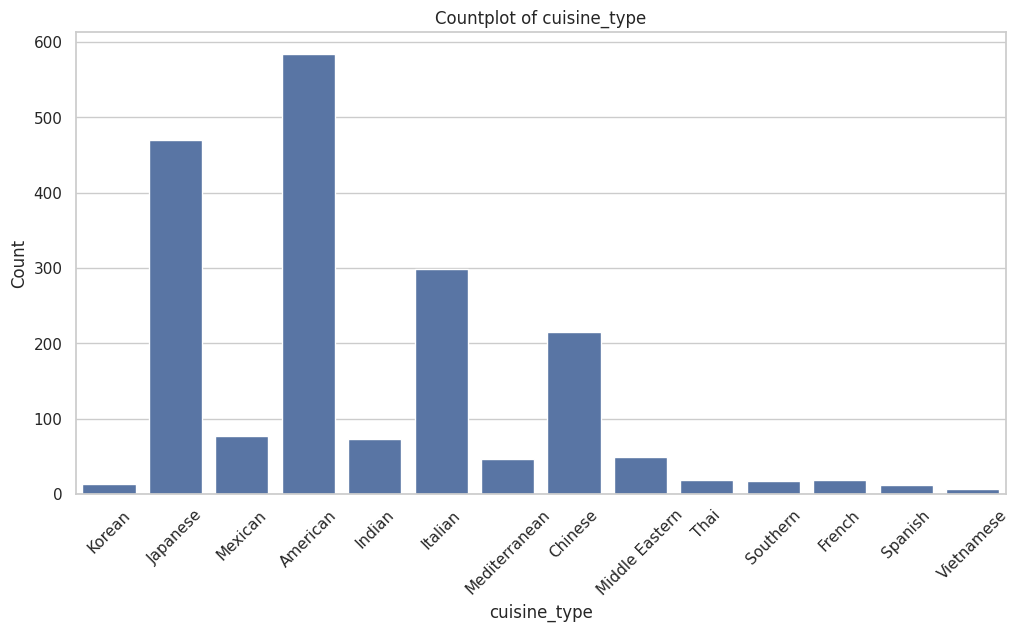

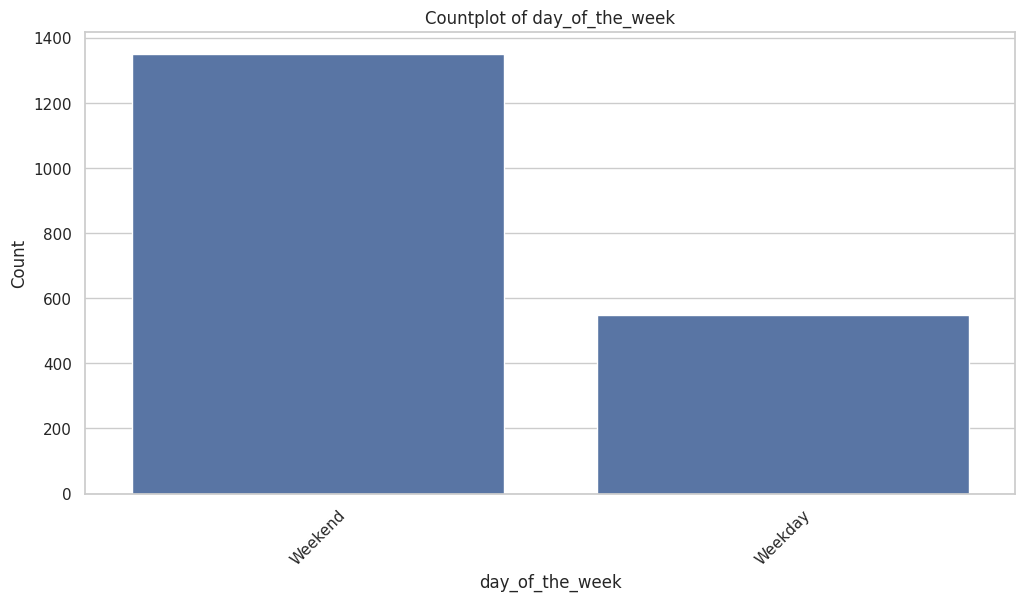

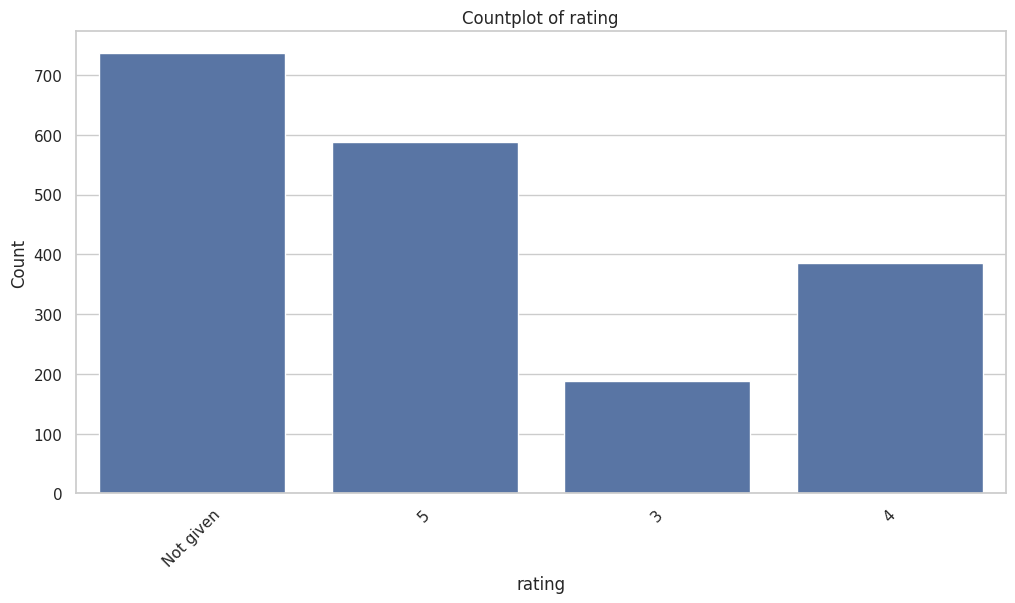

In [28]:
# Categorical variables
categorical_vars = ['cuisine_type', 'day_of_the_week', 'rating']

for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=var, data=foodhub_df)
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

####**Observations:**

####**Continuous Variables:**

**1. Cost of the Order**

*   The right-skewed distribution indicates most orders are low-cost with a
   few high-cost outliers. This suggests a general preference for more affordable meals.

#### **Actionable Insight**

*   Focus marketing efforts on promoting higher-cost menu items to increase average order value.

#### **2. Food Preparation Time**

*   Most orders are prepared within 30 minutes, indicating efficient kitchen operations.

#### **Actionable Insight**

*    Maintaining this efficiency is crucial. Consider implementing measures to handle peak times without compromising preparation time.

#### **3. Delivery Time**

*  The right-skewed distribution indicates that while most deliveries are timely, there are instances of delays.

#### **Actionable Insight**

*   Investigate the causes of delays and optimize delivery routes or increase delivery staff during peak hours.

#### **Categorical Variables:**

**1.Restaurant Name**

*   A few restaurants dominate the order counts.

#### **Actionable Insight**

*   Collaborate with top-performing restaurants for promotions and understand what drives their success to replicate in others.

**2. Cuisine Type:**

*   Popular cuisines like "American", "Japanese", "Italian", "" and "Chinese" attract more orders.

#### **Actionable Insight**

*   Promote these cuisines more aggressively and consider adding similar offerings to less popular categories.

**3. Day of the Week:**

*  Increase in orders on weekends suggests higher demand during these days.

#### **Actionable Insight**

*   Plan for additional resources (staffing, delivery vehicles) on weekends to handle the increased demand.

#### **4. Rating**

 *   High ratings suggest customer satisfaction, but the significant number of "Not given" ratings indicate missing feedback.

##### **Actionable Insight**

 *   Implement follow-up measures to encourage customers to provide ratings, such as post-delivery notifications or incentives for feedback.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [29]:
# Write the code here
# Group by 'restaurant_name' and count the number of 'order_id'
restaurant_order_counts = foodhub_df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)

In [30]:
restaurant_order_counts


,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Klong,1
Kambi Ramen House,1
Il Bambino,1


In [31]:
# Select the top 5 restaurants
top_5_restaurants = restaurant_order_counts.head(5)

In [32]:
print("Top 5 restaurants in terms of number of orders received:")
print(top_5_restaurants)

Top 5 restaurants in terms of number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### **Observations:**

*  Here are the observations based on the top 5 restaurants in terms of the number of orders received

#### **1. Shake Shack:**

*    This restaurant leads by a significant margin with 219 orders. It appears to be very popular among customers.

#### **2. The Meatball Shop:**

*   With 132 orders, it ranks second. It has a strong presence but significantly fewer orders than Shake Shack.

#### **3. Blue Ribbon Sushi:**

*   Coming in third with 119 orders, it indicates a strong preference for sushi among the customer base.

#### **4. Blue Ribbon Fried Chicken:**

*   This restaurant has 96 orders, showing a preference for fried chicken and a notable position among the top restaurants.

#### **5. Parm:**

*   With 68 orders, it completes the top 5. It’s less frequented compared to the top 4 but still holds a significant place.

*   These top 5 restaurants are all popular, but there's a clear leader (Shake Shack) with a substantial lead over the others. The variety in restaurant types (burger, meatballs, sushi, fried chicken, Italian) also shows a diverse range of customer preferences.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [33]:
# Write the code here

In [34]:
grouped_day_of_the_week_df = foodhub_df.groupby('day_of_the_week')['order_id'].count()

In [35]:
grouped_day_of_the_week_df

,order_id
day_of_the_week,
Weekday,547
Weekend,1351


In [36]:
# Filter for orders placed on weekends (Saturday and Sunday)
weekend_orders = foodhub_df[foodhub_df['day_of_the_week'].isin(['Weekend'])]

In [37]:
# Group by 'cuisine_type' and count the number of orders for each cuisine type
cuisine_counts = weekend_orders['cuisine_type'].value_counts()

In [38]:
# Find the most popular cuisine
most_popular_cuisine = cuisine_counts.idxmax()
most_popular_cuisine_count = cuisine_counts.max()

In [39]:
print(f"The most popular cuisine on weekends is: {most_popular_cuisine} with {most_popular_cuisine_count} orders")

The most popular cuisine on weekends is: American with 415 orders


#### **Observations:**

####  **Most Popular Cuisine on Weekends:**

*   The most popular cuisine on weekends is American, with 415 orders.

#### **Insight:**

*   American cuisine has a strong appeal during weekends,potentially due to its popularity or specific promotions.Leveraging this insight, the company could focus on enhancing its Italian cuisine offerings or creating weekend-specific promotions.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [40]:
# Write the code here
# Total number of orders
total_orders = foodhub_df.shape[0]

In [41]:
# Number of orders costing more than 20 dollars
orders_above_20 =  foodhub_df[ foodhub_df['cost_of_the_order'] > 20].shape[0]

# Percentage of orders costing more than 20 dollars
percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f"Percentage of orders costing more than 20 dollars: {percentage_above_20:.2f}%")

Percentage of orders costing more than 20 dollars: 29.24%


#### **Observations:**

#### **Percentage of High-Cost Orders:**

*   29.24% of the orders cost more than 20 dollars.

#### **Insight:**

*   Nearly one-third of the orders are above the 20-dollar mark, indicating a significant portion of customers are willing to spend more.

*   This suggests a potential for higher revenue if targeted correctly.

#### **Recommendations:**

 1. **Promote Higher-Value Menu Items**

*   Highlight higher-value menu items in promotions and advertisements. Consider offering combo deals or upsell strategies to encourage customers to increase their order value.

2. **Loyalty Programs:**

*   Implement a loyalty program that rewards customers who frequently place higher-value orders. This can help in retaining high-spending customers and encouraging repeat business.

3. **Premium Service Offers:**

*   Introduce premium services or exclusive deals for customers who place orders above a certain value, such as priority delivery or special packaging.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [42]:
# Write the code here
# Calculate the mean order delivery time
mean_delivery_time = foodhub_df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


In [43]:
mean_delivery_time

24.161749209694417

#### **Observations:**

#### **Mean Order Delivery Time:**

*   The mean order delivery time is 24.16 minutes.

#### **Insight:**

*   An average delivery time of around 24 minutes indicates a relatively quick delivery service. However, it's important to ensure that this average meets customer expectations and maintains high satisfaction levels.

#### **Recommendations:**

 **Maintain and Improve Delivery Efficiency:**

*   Continue to monitor and optimize delivery processes to ensure the mean delivery time remains around 24 minutes or less.

*   This could involve optimizing delivery routes, improving order processing times, or increasing delivery personnel during peak hours.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [44]:
# Write the code here
# Group by 'customer_id' and count the number of orders for each customer
customer_order_counts = foodhub_df.groupby('customer_id')['order_id'].count()

# Sort the counts in descending order and select the top 3 customers
top_3_customers = customer_order_counts.sort_values(ascending=False).head(3)

print("Top 3 most frequent customers and the number of orders they placed:")
print(top_3_customers)

Top 3 most frequent customers and the number of orders they placed:
customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### **Observations:**

#### **1. Top 3 Customers Identified**

*   Customer with customer_id 52832 placed 13 orders.

*   Customer with customer_id 47440 placed 10 orders.

*   Customer with customer_id 83287 placed 9 orders.

#### **2. Discount Vouchers**

*   The company has decided to reward these top 3 customers with 20% discount vouchers. This is a good strategy to maintain customer loyalty and encourage further purchases.

#### **3. Customer Insights**

*   These customers are likely regular users of the service.

*   Understanding their preferences and behavior might help in designing personalized promotions or offers in the future.

#### **4. Business Impact**

*  By identifying and rewarding frequent customers, the company can potentially
increase customer satisfaction and retention, which is crucial for long-term success.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


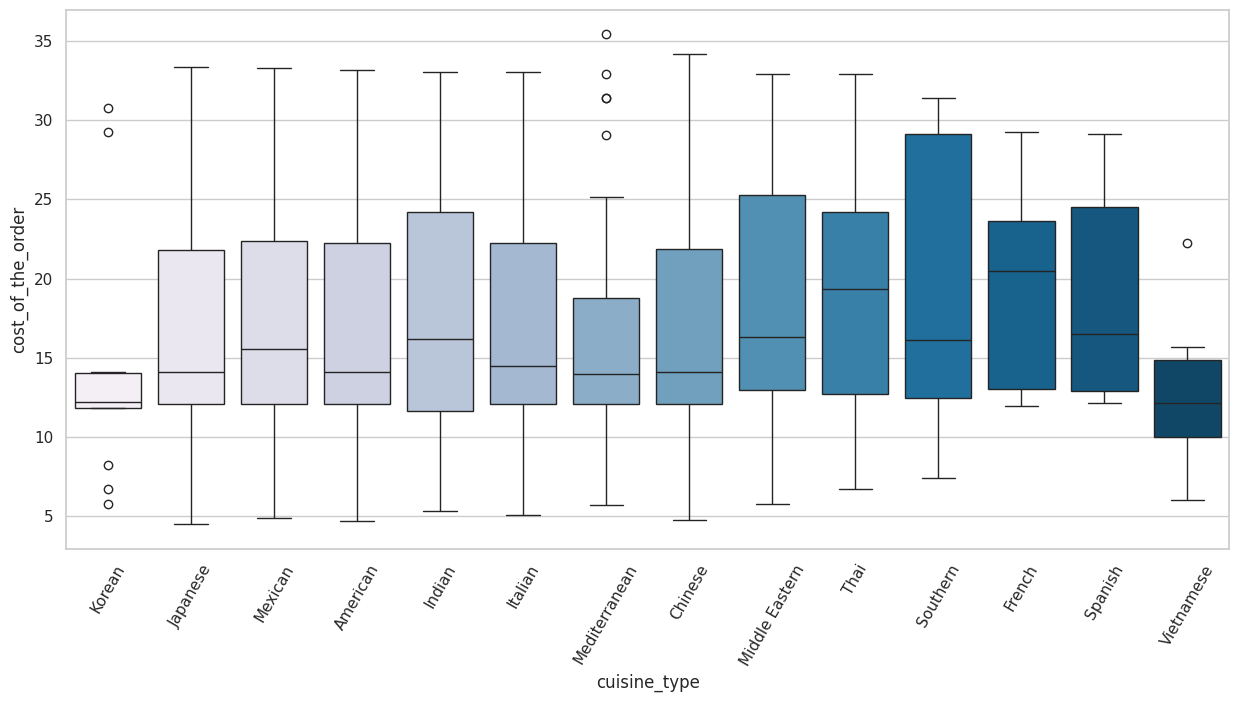

In [45]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = foodhub_df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Observations:

#####1. **Variation Across Cuisines**:

*   There is noticeable variation in the cost of orders among different cuisines.

*  **Southern** cuisine tends to have the highest median cost, followed closely by **French** and **Thai** cuisines.

* **Korean** cuisine shows the lowest median cost and the narrowest interquartile range, indicating that orders for Korean cuisine are generally less expensive and more consistent in price.

##### 2. **Interquartile Range (IQR)**:

*   Cuisines like **Southern**, **Thai**, and **Mexican** have a wider IQR, suggesting greater variability in the cost of orders.

*   **Vietnamese **and **Chinese** cuisines have a relatively narrower IQR, indicating more consistent pricing within these categories.

#### 3. **Outliers**:

*   There are several outliers present in the boxplot, especially in Japanese, Mexican, and Thai cuisines. These outliers suggest that there are some unusually high-cost orders within these cuisines.

#### 4. **Skewness**:

*   Some cuisines, such as Italian and Chinese, show a slight positive skew, where a few orders are significantly more expensive than the majority, as indicated by the longer upper whisker.

####5. **Overlap**:

*  The boxplots for different cuisines overlap significantly, especially among mid-range cuisines like American, Indian, and Mexican. This suggests that the cost of orders for these cuisines may not be significantly different from one another.

#### 6. **Consistency in Pricing**:

*   Cuisines like Korean and Vietnamese are more consistent in their pricing, as indicated by the narrow IQR and fewer outliers.
In contrast, Southern and Mexican cuisines show higher variability, with wider IQRs and more outliers.

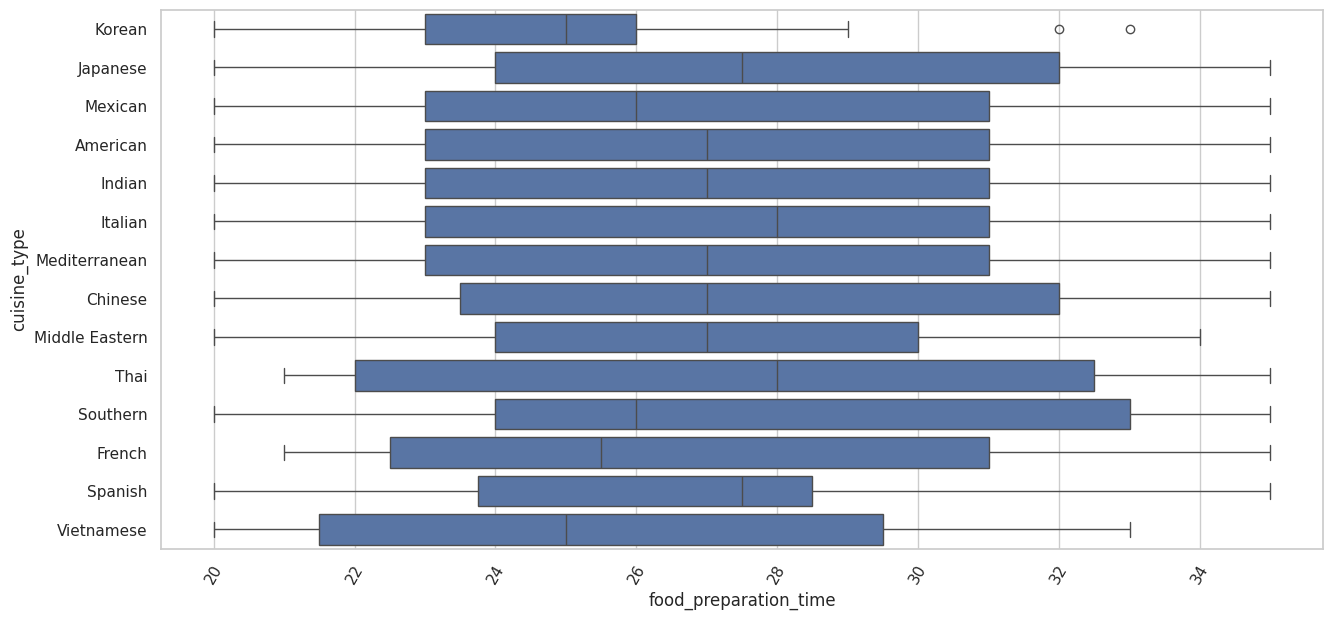

In [46]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'food_preparation_time', y = 'cuisine_type', data = foodhub_df)
plt.xticks(rotation = 60)
plt.show()

####Observations:

#### **1. Median Food Preparation Time:**

*   Most cuisines have a median food preparation time between 24 to 28 minutes.

* **Japanese** cuisine has the highest median preparation time, indicating that on average, Japanese dishes take longer to prepare compared to other cuisines.

*  **Chinese** cuisine has one of the lowest median preparation times, suggesting quicker preparation compared to others.

#### 2. **Interquartile Range (IQR)**:

*   **Mexican, Indian,** and **Southern** cuisines exhibit a wider IQR, which means there is greater variability in how long different dishes take to prepare within these cuisines.

*   **Vietnamese** and **French** cuisines have a narrower IQR, indicating more consistent preparation times.

#### 3. **Outliers**:

*   **Japanese** cuisine has a few outliers with longer preparation times, indicating that some orders take significantly more time than typical for this cuisine.

*  Most other cuisines have no or very few outliers, suggesting that the preparation times are more predictable.

#### 4. **Consistency in Preparation Times**:

*   Cuisines like Vietnamese, Chinese, and French show more consistent preparation times with narrower boxes and fewer outliers.

*   In contrast, Mexican, Indian, and Southern cuisines show more variability, with longer whiskers and larger boxes, suggesting that preparation times can vary significantly depending on the dish.

#### 5. **Comparison Across Cuisines:**

*  **Japanese** cuisine stands out with consistently higher preparation times, while **Chinese** and **Vietnamese** cuisines are on the lower end.

*   **Middle Eastern** cuisine shows an interesting distribution with a median close to 26 minutes, but with a broad range, indicating some dishes may take much longer to prepare.

#### **Interpretation:**

  The plot suggests that the type of cuisine has a noticeable impact on how long food takes to prepare. While some cuisines like **Chinese** and **Vietnamese** tend to have quicker and more consistent preparation times, others like **Japanese** and **Mexican** can vary significantly, potentially impacting delivery times and customer expectations. This information could be useful for managing kitchen operations or setting customer expectations for delivery times based on the type of cuisine ordered.

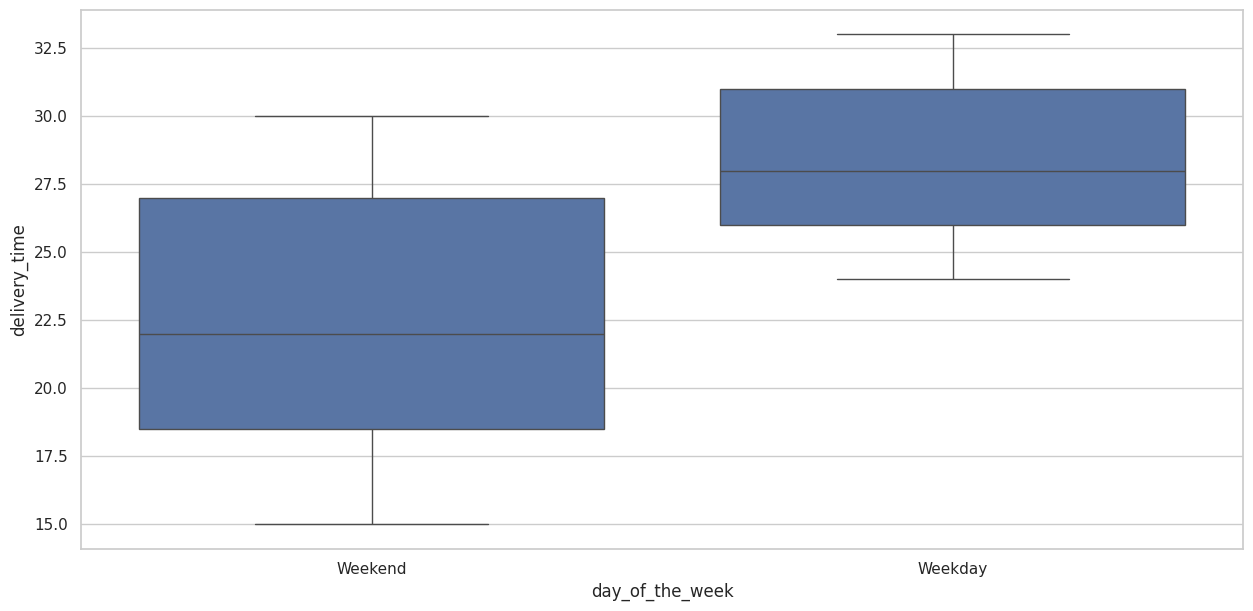

In [47]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = foodhub_df)
plt.show()

####Observations:

##### **1. Median Delivery Times:**

*  The median delivery time varies slightly across different days of the week. However, there doesn't seem to be a drastic difference in the median delivery times from one day to another.

#### **2. Variation in Delivery Times:**

*   The interquartile range (IQR), which represents the middle 50% of the data, is fairly consistent across most days of the week. This indicates that the bulk of delivery times are similar on different days.

*   Some days show a wider IQR, suggesting more variability in delivery times on those days.

#### **3. Outliers:**

*   Outliers are visible across several days of the week. These represent instances where the delivery time was unusually long or short compared to the typical range for that day.

*   The presence of outliers may suggest that, on occasion, factors like traffic, order complexity, or restaurant delays can cause significant deviations in delivery time.

#### **4. Consistency Across Days:**

*  Overall, there appears to be a consistent pattern of delivery times throughout the week, with no particular day standing out as having significantly longer or shorter delivery times on average.

*   The consistency suggests that the delivery process is fairly stable regardless of the day, though there are occasional delays as indicated by the outliers.

#### **Interpretation:**

The boxplot suggests that the day of the week does not have a strong influence on delivery times, as the median delivery times are relatively stable. However, occasional outliers indicate that delivery times can sometimes be significantly delayed. Improving the consistency and reducing outliers could enhance overall delivery efficiency and customer satisfaction.

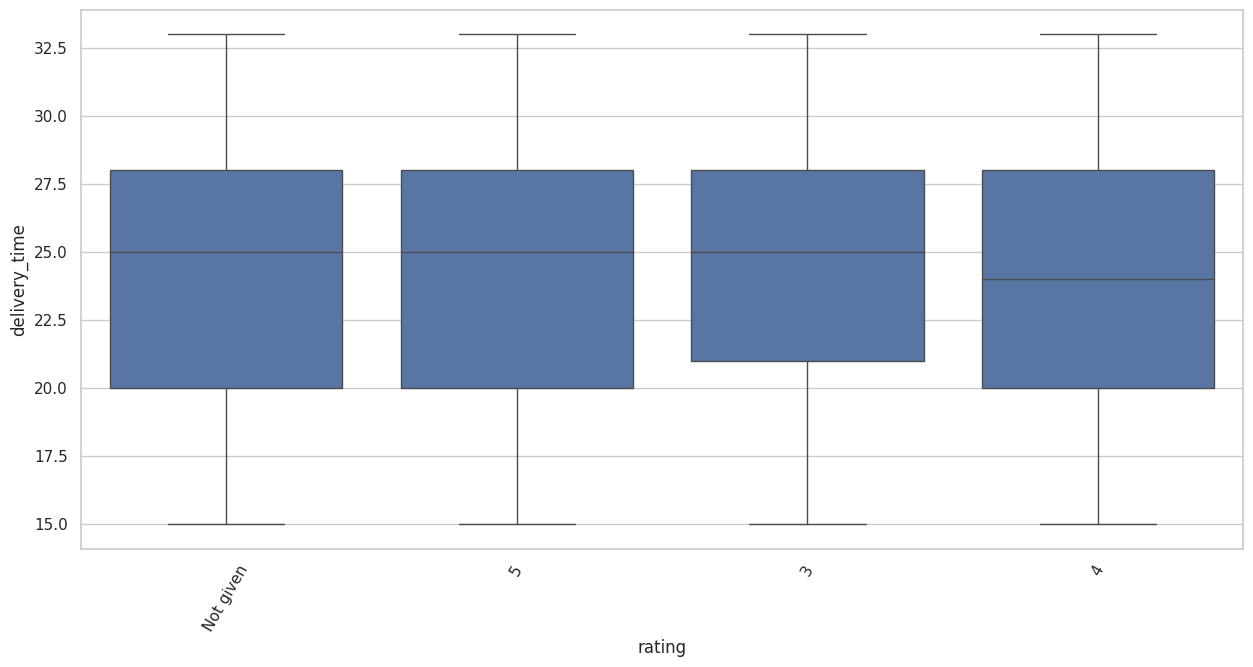

In [48]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = 'rating', y = 'delivery_time', data = foodhub_df)
plt.xticks(rotation = 60)
plt.show()

#### **Observations:**

#### **1. Median Delivery Times:**

*   The median delivery time slightly varies across different ratings. However, it generally remains within a similar range across all ratings, indicating that delivery times do not drastically differ based on the rating.

#### **2. Variation in Delivery Times:**

*   There is some variability in delivery times across different ratings, as indicated by the interquartile range (IQR).

*   Higher ratings (closer to 5) show slightly tighter IQRs, indicating more consistent delivery times. In contrast, lower ratings (closer to 2.5) have slightly wider IQRs, suggesting more variability in delivery times for these ratings.

#### **3.Outliers:**

*   Outliers are present across all rating categories, with some outliers indicating much longer delivery times. This could suggest that in some cases, longer delivery times might contribute to lower customer ratings.

*   However, outliers exist even in higher-rated deliveries, indicating that a long delivery time doesn’t always lead to a lower rating.

#### **4. Overall Pattern:**

*   The general trend doesn’t show a strong correlation between delivery time and customer rating. While more consistent and slightly faster delivery times might be associated with higher ratings, other factors likely play a more significant role in determining customer satisfaction.

#### **Interpretation:**

The boxplot suggests that while delivery time does have some impact on customer ratings, it is not the sole determining factor. Even with longer delivery times, high ratings can be achieved, possibly due to other factors like food quality, customer service, or accuracy of the order. Therefore, while focusing on reducing delivery times might improve ratings slightly, a holistic approach considering all aspects of the customer experience will likely have a greater impact on overall ratings.

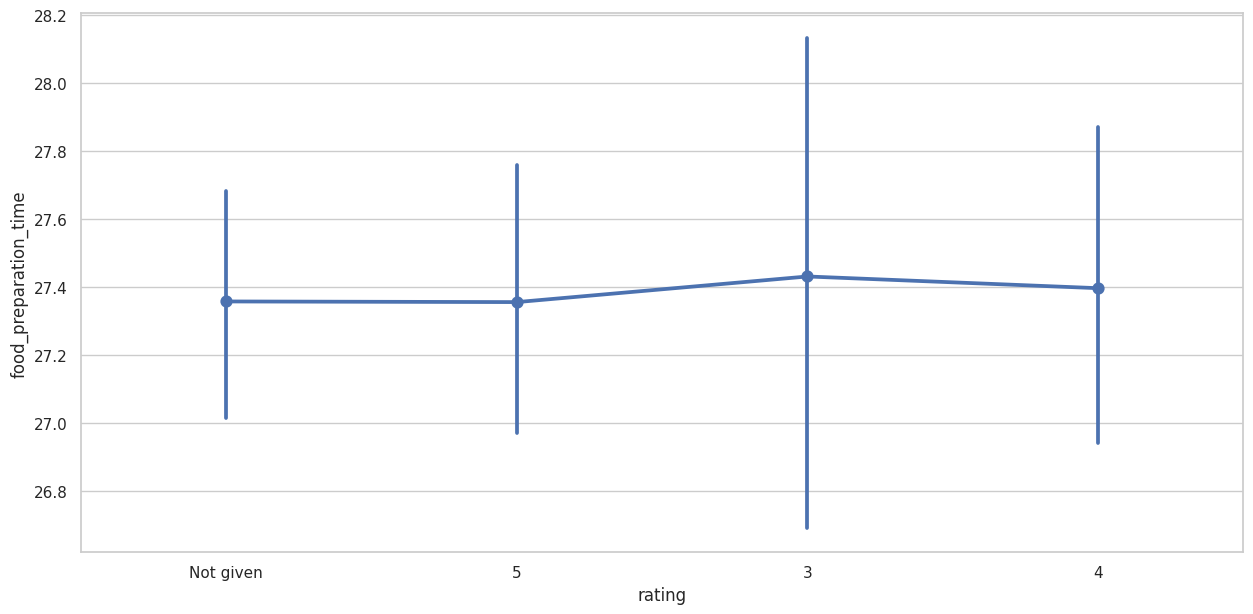

In [49]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = foodhub_df)
plt.show()

#### **Observations:**

#### **1. Trend Between Rating and Food Preparation Time:**

*   The point plot shows a general trend where food preparation time slightly decreases as ratings increase. This suggests that customers may give higher ratings when the food preparation time is shorter.

*   However, the trend is not very steep, indicating that while food preparation time has some impact on customer ratings, it is not the dominant factor.

#### **2. consistency Across Ratings:**

*   The food preparation times across different ratings are fairly consistent, with only slight variations. This suggests that most restaurants have a relatively stable food preparation process, regardless of the customer rating.

*   The differences in food preparation times across various ratings are minimal, implying that even minor improvements in preparation time could lead to better customer ratings.

#### **3. High Ratings and Faster Preparation Times:**

*   There is a slight drop in preparation time associated with higher ratings (closer to 5). This suggests that customers might be more satisfied when their food is prepared more quickly.

*   Conversely, longer preparation times may lead to slightly lower ratings, but the effect is not dramatic.

#### **4. Possible Impact of Other Factors:**

*  While there is a relationship between food preparation time and rating, the relatively flat trendline suggests that other factors, such as food quality, accuracy of the order, and delivery experience, may play a more significant role in determining customer satisfaction.

#### **Interpretation:**

The point plot suggests a weak negative correlation between food preparation time and customer ratings, meaning that quicker preparation times might contribute to slightly higher ratings. However, given the subtle trend, it’s clear that food preparation time alone does not heavily influence customer ratings. Restaurants should maintain efficient preparation processes but also focus on other aspects of the customer experience, such as food quality and order accuracy, to maximize customer satisfaction and achieve higher ratings.

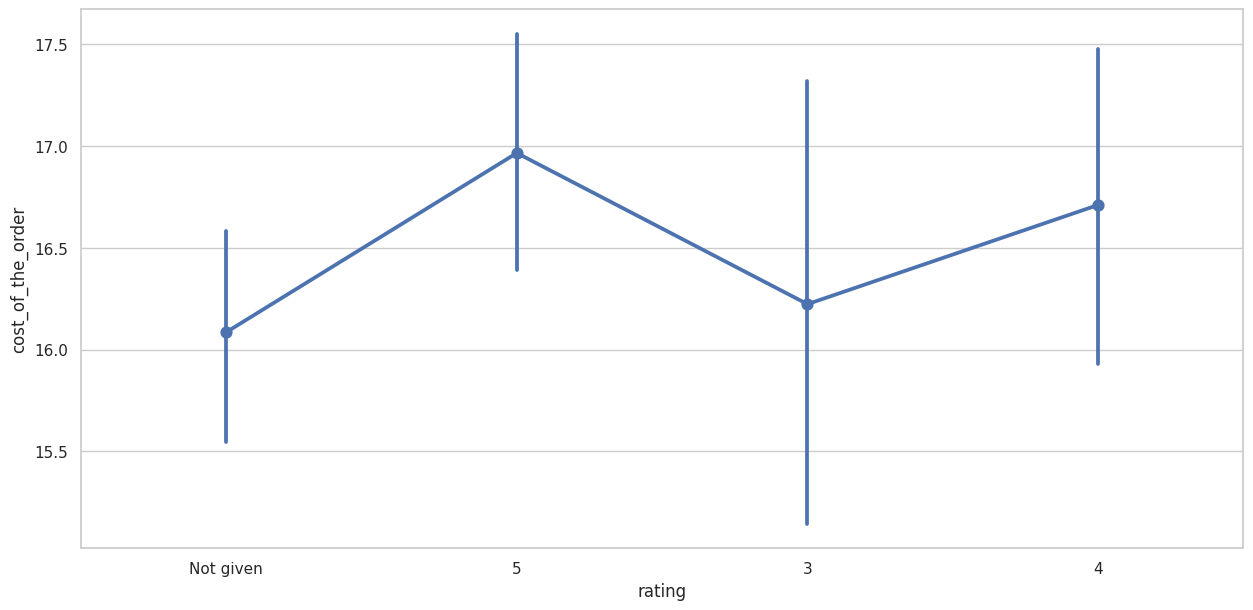

In [50]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = foodhub_df)
plt.show()

#### **Observations:**

#### **1. Trend Between Rating and Cost of the Order:**

*   The point plot indicates a slight positive trend where higher ratings are associated with slightly higher costs of the order. This suggests that customers who spend more might be more likely to give a higher rating.

*   However, the trend is not very steep, indicating that the cost of the order alone does not strongly influence customer ratings.

#### **2. Consistency Across Ratings:**

*   The cost of orders remains relatively stable across different ratings, with only minor fluctuations. This consistency suggests that the cost is not a major factor in determining the rating.

*  The differences in costs across various ratings are minimal, indicating that other factors, such as the quality of the food, delivery time, and customer service, might have a more significant impact on customer satisfaction.

#### **3. Higher Costs and Ratings:**

*   There is a slight increase in the cost associated with higher ratings (closer to 5). This could imply that customers who are willing to spend more tend to be more satisfied with their purchase.

*  Conversely, lower ratings are associated with slightly lower costs, but this difference is not substantial.

#### **4. Possible Impact of Other Factors:**

*  The relatively flat trendline suggests that while there is some correlation between the cost of the order and customer ratings, it is likely not the primary driver of satisfaction.

*   Other aspects such as the quality of the food, the accuracy of the order, the timeliness of the delivery, and the overall customer experience may play a more significant role in determining customer ratings.

#### **Interpretation:**

The point plot suggests a weak positive correlation between the cost of the order and customer ratings, meaning that customers who spend more might be slightly more inclined to give higher ratings. However, given the subtle nature of the trend, it’s clear that the cost of the order alone does not heavily influence customer ratings. To achieve higher ratings, restaurants should focus on delivering quality food, ensuring timely delivery, and providing excellent customer service, as these factors are likely more impactful on customer satisfaction than the cost of the order itself.

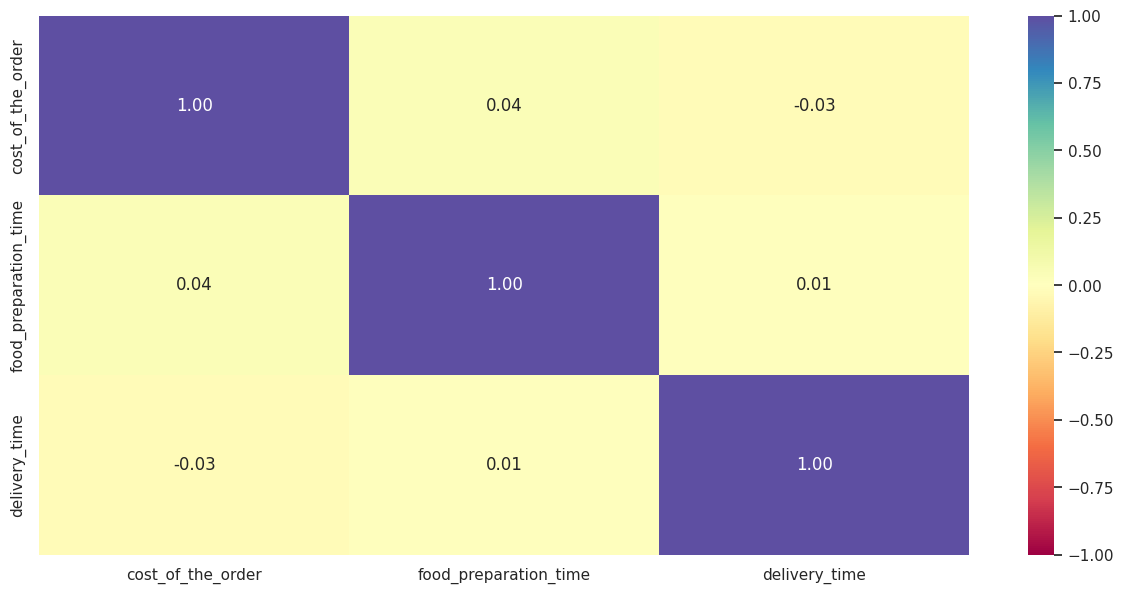

In [51]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(foodhub_df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### **Observations:**

#### **1. Weak Correlations:**

*   There are very weak correlations among all three variables, as indicated by the values close to zero in the heatmap.

#### **2. No Strong Relationships:**

*   The lack of strong colors (indicating high correlation values) suggests that there is no significant linear relationship between any pair of these variables.

#### **Interpretation:**

**Based on the heatmap, it can be concluded that:**

*   The cost of an order has minimal influence on food preparation time or delivery time.

*   Food preparation time has a negligible impact on delivery time.

*   Delivery time is not significantly affected by the cost of the order or food preparation time.

*  In essence, the variables in this dataset appear to be largely independent of each other.

**To gain deeper insights, consider:**

*  Visualizing distributions: Histograms or box plots for each variable can reveal their individual characteristics.

*   Exploring other variables: If available, analyzing correlations with additional factors might uncover hidden patterns.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [52]:
# Write the code here


In [53]:
# Convert 'rating' to numeric, treating 'Not given' as NaN
foodhub_df['rating'] = pd.to_numeric(foodhub_df['rating'], errors='coerce')

In [54]:
# Group by 'restaurant_name' and calculate the number of ratings and the average rating
rating_stats = foodhub_df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants based on the given criteria
promotional_offers = rating_stats[(rating_stats['count'] > 50) & (rating_stats['mean'] > 4)]

print(promotional_offers)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### **Observations:**

####**1.  Conversion of rating to Numeric:**


*    The rating column is converted to numeric, with any non-numeric entries (such as 'Not given') being treated as NaN. This ensures accurate calculations for the subsequent analysis.

####**2. Rating Statistics Calculation:**

**The code calculates two key statistics for each restaurant:**

*   Count of Ratings (count): The total number of ratings a restaurant has received

*   Mean Rating (mean): The average rating of the restaurant.

####**3. Filtering Restaurants for Promotional Offers:**

**Restaurants are filtered based on the following criteria:**

*   Count > 50: The restaurant must have received more than 50 ratings.

*   Mean > 4: The average rating of the restaurant must be greater than 4.

*   This filtering helps identify restaurants that are both popular (based on the number of ratings) and highly rated by customers.

####**4. Restaurants Eligible for Promotional Offers:**

**Based on the given dataset, the following restaurants meet the criteria:**

*   Blue Ribbon Fried Chicken: 64 ratings with an average rating of 4.33.

*   Blue Ribbon Sushi: 73 ratings with an average rating of 4.22.

*   List itemShake Shack: 133 ratings with an average rating of 4.28.

*   The Meatball Shop: 84 ratings with an average rating of 4.51.

#### **Business Implications:**

1. **Promotion Strategy:**

   The identified restaurants are good candidates for promotional offers, as they are not only popular but also maintain high customer satisfaction.

2. **Customer Attraction:**

  Highlighting these high-performing restaurants in advertisements can attract more customers and further enhance their reputation.

3. **Targeted Marketing:**

  The company can use this information to focus its marketing efforts on
restaurants that are likely to yield higher returns due to their strong customer appeal.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [55]:
# Write the code here
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Apply the function to calculate revenue for each order
foodhub_df['revenue'] = foodhub_df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total net revenue
total_revenue =foodhub_df['revenue'].sum()

print(f"The total net revenue generated by the company is: ${total_revenue:.2f}")




The total net revenue generated by the company is: $6166.30


#### **Observations:**

#### **1. Revenue Distribution:**

*  The majority of the revenue likely comes from orders costing more than $20, as these generate a higher percentage (25%) of revenue.

*    Orders costing between $5 and $20 contribute to a smaller portion of the revenue (15%), but given the likely higher frequency of these orders, they still represent a significant portion of the total revenue.

*  Orders costing $5 or less do not contribute to the revenue, so their frequency does not impact the revenue total directly.

#### **2. Revenue Generation Strategy:**

*  The company’s revenue strategy is tiered based on the order cost, with higher-cost orders generating more revenue proportionally.

*   This strategy incentivizes the company to promote higher-value orders, as these contribute more to the net revenue.

#### **3. Impact on Business Decisions:**

 **1. Pricing and Promotions:**

*    The company might consider creating promotions or incentives to increase the average order size to exceed $20, thereby maximizing revenue.

**2. Customer Segmentation:**

*   Understanding the distribution of order sizes can help in segmenting customers and targeting them with specific marketing strategies. For example, encouraging customers who typically place orders around $15 to increase their order size to benefit from additional items or discounts.

**3.Revenue Growth Potential**

*    By analyzing the total revenue and the distribution of order costs, the
company can identify potential areas for revenue growth, such as introducing higher-priced menu items or upsell opportunities.

#### **Important Details:**

*   **Revenue Concentration:**

   A significant portion of the total revenue is likely concentrated among higher-cost orders. The company should focus on maintaining or increasing these high-value orders.

*   **Zero-Revenue Orders:**

   Orders under $5 do not generate any revenue, which could be considered when analyzing customer behavior and profitability. The company might explore ways to either increase the average spend of these customers or adjust the commission structure.

*   **Total Revenue:**

  The net revenue generated, $6166.30, provides a baseline for the company's earnings over the analyzed period. This figure can be compared against operational costs to assess profitability.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [56]:
# Write the code here

In [57]:
# Calculate the total time required to deliver the food
foodhub_df['total_delivery_time'] = foodhub_df['food_preparation_time'] + foodhub_df['delivery_time']

# Count the number of orders taking more than 60 minutes
orders_over_60 = foodhub_df[foodhub_df['total_delivery_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = foodhub_df.shape[0]

# Calculate the percentage of orders taking more than 60 minutes
percentage_over_60 = (orders_over_60 / total_orders) * 100

print(f"The percentage of orders taking more than 60 minutes to get delivered is: {percentage_over_60:.2f}%")

The percentage of orders taking more than 60 minutes to get delivered is: 10.54%


#### **Observations:**

#### **1. Calculation of Total Delivery Time:**

*   The total_delivery_time for each order is calculated by summing the food_preparation_time and delivery_time.

*   This total time represents the complete duration from when the order is placed to when it is delivered to the customer.

#### **2.Identifying Orders Taking More Than 60 Minutes:**

*   The code counts the number of orders where the total_delivery_time exceeds 60 minutes.

*  This count is stored in the variable orders_over_60.

**3. Total Number of Orders:**

*   The total number of orders in the dataset is determined using foodhub_df.shape[0].

#### **4. Percentage Calculation:**

*   The percentage of orders taking more than 60 minutes is calculated by dividing orders_over_60 by the total number of orders (total_orders) and multiplying by 100.

*  The resulting percentage is 10.54%.


#### **Business Implications:**

**1. Operational Efficiency:**

The fact that 10.54% of orders take more than 60 minutes to be delivered could indicate potential inefficiencies in either food preparation or delivery processes. This may require further investigation to identify and address bottlenecks.

**2. Customer Satisfaction:**

 Delivery time is a critical factor in customer satisfaction. A significant percentage of delayed orders could lead to negative customer experiences and impact ratings. The company may need to implement strategies to reduce delivery times.

**3. Process Improvement:**

Understanding the reasons behind these delays—whether due to complex food preparation, traffic conditions, or other factors—can help the company improve its overall service efficiency.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [58]:
# Write the code here

In [59]:
# Group by 'day_type' and calculate the mean delivery time
mean_delivery_time = foodhub_df.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### **Observations:**

##### **Weekday Delivery Time:**

1. **Mean:**

   28.34 minutes

2. **Implication:**

  On weekdays, the average delivery time is longer. This could be due to higher order volumes, traffic congestion during peak hours, or increased operational complexity during workdays.

#### **Weekend Delivery Time:**

1. **Mean:**

  22.47 minutes

2. **Implication:**

  On weekends, the average delivery time is shorter. This might be because there are fewer orders, which can lead to more efficient handling and less traffic, or possibly because there are different delivery patterns or staffing levels that facilitate faster delivery.

#### **Key Observations:**

#### **Comparison:**

   There is a clear difference of approximately 5.87 minutes between weekday and weekend delivery times. The shorter delivery time on weekends might indicate better efficiency or reduced operational constraints.

#### **Potential Factors:**

1. **Order Volume:**

   Weekdays might have a higher volume of orders, which can lead to longer wait times.

2. **Traffic:**

   Weekdays could experience heavier traffic, increasing delivery times compared to weekends when traffic might be lighter.

3. **Staffing:**

   There might be variations in staffing levels or operational processes between weekdays and weekends affecting delivery efficiency.

4. **Customer Behavior:**

  Order patterns or peak times may differ between weekdays and weekends, influencing delivery times.

#### **Further Analysis Suggestions:**

1. **Order Volume Analysis:**

  Examine the number of orders placed on weekdays versus weekends to see if higher volumes contribute to longer delivery times.

2. **Traffic Patterns:**

  Analyze traffic data to understand how congestion might impact delivery times on different days.

3. **Operational Changes:**

 Investigate any operational differences or staffing levels between weekdays and weekends that could affect delivery efficiency.

4. **Customer Preferences:**

  Explore if customer preferences or peak ordering times vary between weekdays and weekends, potentially influencing delivery times.







### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### **Conclusions from the Analysis:**

**1. Customer Satisfaction and Delivery Time:**

*   There is a noticeable relationship between delivery time and customer satisfaction. Faster delivery times are generally associated with higher ratings. However, the impact of delivery time on ratings is not drastic, indicating that other factors also play significant roles in determining customer satisfaction.

**2. Food Preparation Time and Ratings:**

*   There is a slight trend showing that shorter food preparation times are correlated with higher customer ratings. However, this trend is subtle, suggesting that while preparation time matters, it is not the only factor influencing ratings.

**3. Cost of the Order and Ratings:**

*   Higher costs are slightly associated with higher ratings, implying that customers who are willing to spend more might expect and appreciate better quality or service. However, the relationship is not strong, suggesting that value for money, rather than the absolute cost, might be more important to customers.

**4. Cuisine Type and Preparation Time:**

Different cuisines have different preparation times, with some cuisines like French and Southern generally taking longer to prepare. Cuisines with more consistent and shorter preparation times tend to have fewer outliers, potentially leading to more consistent customer experiences.

#### **Recommendations:**

**1. Improve Delivery Efficiency:**

*   **Focus on Consistency:**  
 Since consistent delivery times are associated with higher customer satisfaction, efforts should be made to reduce variability and minimize outliers in delivery times. This can be achieved by optimizing delivery routes, better managing peak times, and possibly expanding the delivery fleet during busy periods.

*   **Targeted Improvements for Slow Days**:
  Analyze which days have more significant delivery delays and implement targeted strategies to improve performance on those specific days.

#### **2. Optimize Food Preparation Processes:**

*   **Streamline Preparation for Longer-Taking Cuisines:**
   
   For cuisines that typically take longer to prepare (e.g., French, Southern), consider streamlining the preparation process without compromising quality. This might involve pre-preparation techniques or better kitchen management to reduce overall preparation time.

*   **Focus on High-Volume, Consistent Cuisines:**

   Since some cuisines have more consistent preparation times, focus on promoting these cuisines during peak hours to ensure faster service and potentially higher ratings.

#### **3. Leverage Pricing Strategies:**

*   **Enhance Perceived Value:**

 Since higher costs are slightly associated with better ratings, it is essential to ensure that customers perceive they are getting value for their money. This can be achieved by offering premium options or bundle deals that enhance the perceived value.

*   **Introduce Tiered Pricing:**

 Consider introducing tiered pricing based on delivery time guarantees or preparation speed. Customers might be willing to pay more for faster service, which could also help manage customer expectations and satisfaction.

#### **4. Enhance Customer Experience Across All Touchpoints:**

*   **Focus on Overall Experience:**

 Given that delivery time, preparation time, and cost are only part of the equation, focus on improving the overall customer experience, including the quality of the food, accuracy of orders, and customer service. Ensuring that each touchpoint is optimized will help drive higher ratings and repeat business.

*   **Collect and Analyze Feedback**:

  Continue to collect customer feedback and ratings, and analyze this data to identify specific areas of improvement. Regularly update processes based on this feedback to continuously enhance the customer experience.

#### **Business Strategy:**

*   **Promote High-Rating Cuisines:**

 Use customer feedback and ratings to identify the most popular and highly-rated cuisines. Focus marketing efforts on these cuisines to attract more customers, leveraging their established popularity.

*   **Customer Loyalty Programs:**

 Implement loyalty programs that reward customers based on their spending and satisfaction. Encourage repeat business by offering discounts or perks for higher spending customers who tend to rate the service more favorably.

By focusing on these areas, the business can improve operational efficiency, enhance customer satisfaction, and ultimately drive higher ratings and repeat business.

---